In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [ ]:
%%writefile get_data.sh
mkdir -p data
if [ ! -f data/bikeshare.csv ]; then
  wget -O data/bikeshare.csv https://www.dropbox.com/scl/fi/pqg3wpt5e1ltjyrk1ty6e/bikeshare.csv?rlkey=fnv6jbytx723ax6orgegg0pj6&dl=0
fi
if [ ! -f data/sacramento.csv ]; then
  wget -O data/sacramento.csv https://www.dropbox.com/scl/fi/cfw173th70cnhxcf391bg/sacramento_real_estate_transactions.csv?rlkey=frcssm4tdjf0xrtlwnj5znm2n&dl=0
fi


In [ ]:
!bash get_data.sh

In [ ]:
sac_csv = './data/sacramento_real_estate_transactions.csv'
sac=pd.read_csv(sac_csv)
sac.head()

In [2]:
sac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [3]:
# Zip code is better as a string object (categorical) so I will have to convert it.
sac['zip'] = sac['zip'].astype(str)

<AxesSubplot:>

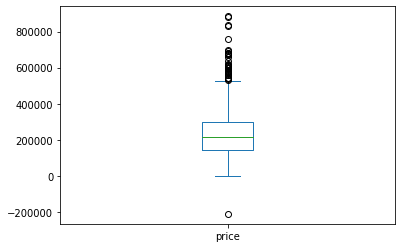

In [4]:
sac.price.plot(kind='box')

In [5]:
sac.shape

(985, 12)

In [6]:
sac[sac['price']>600000].zip.value_counts()

95762    5
95747    2
95746    2
95693    2
95864    1
95661    1
95628    1
95819    1
95650    1
95630    1
95608    1
95667    1
Name: zip, dtype: int64

In [7]:
sac[sac['price'] < 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [8]:
# Clean the data
sac[sac['sq__ft'] < 0]
sac[sac['state'] != 'CA']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [9]:
# drop weird values 
sac.drop(703, inplace = True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Define a function that accepts a list of features and returns testing RMSE.
def train_test_rmse(df, feature_cols):
    X = df[feature_cols]
    y = df.price
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=99)
    print('-----')
    print('size of train data : ', X_train.shape)
    print('size of test data : ', X_test.shape)
    
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [11]:
print(train_test_rmse(sac, ['beds', 'baths', 'sq__ft']))

-----
size of train data :  (688, 3)
size of test data :  (296, 3)
128040.11489990925


<AxesSubplot:>

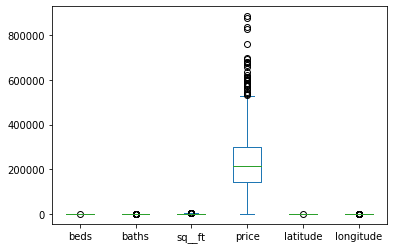

In [12]:
sac.plot(kind='box')

In [13]:
sac.longitude.describe()

count    984.000000
mean    -121.355832
std        0.138268
min     -121.551704
25%     -121.446121
50%     -121.376010
75%     -121.295557
max     -120.597599
Name: longitude, dtype: float64